In [26]:
import struct
import numpy as np
def save_vector_field(U, V, W, filename):
    #data checks
    u_shape = U.shape
    v_shape = V.shape
    w_shape = W.shape

    if len(u_shape) != 3:
        raise ValueError(f"U is {str(len(u_shape))} demensional.  The data needs to be 3 demensional.")
    if len(v_shape) != 3:
        raise ValueError(f"V is {str(len(v_shape))} demensional.  The data needs to be 3 demensional.")
    if len(w_shape) != 3:
        raise ValueError(f"W is {str(len(w_shape))} demensional.  The data needs to be 3 demensional.")

    if u_shape != v_shape:
        raise ValueError(f"U ({str(u_shape)}) and V ({str(v_shape)}) arrays shape do not match")
    if u_shape != w_shape:
        raise ValueError(f"U ({str(u_shape)}) and W ({str(w_shape)}) arrays shape do not match")
    if v_shape != w_shape:
        raise ValueError(f"V ({str(v_shape)}) and W ({str(w_shape)}) arrays shape do not match")


    vector_field = np.stack((W,V,U))
    print(np.shape(vector_field))

    # Determine volume size
    i, depth, height, width = vector_field.shape
    volume_size = (width, height, depth)

    # Determine FourCC and stride
    if vector_field.dtype == np.float32:
        fourcc = b'VF_F'
        stride = 1
    elif vector_field.dtype == np.float64:
        fourcc = b'VF_F'
        stride = 1
        vector_field = vector_field.astype(np.float32)  # Convert to float32
    elif vector_field.dtype == np.float16:
        fourcc = b'VF_F'
        stride = 1
        vector_field = vector_field.astype(np.float32)  # Convert to float32
    elif vector_field.dtype == np.float128:
        fourcc = b'VF_F'
        stride = 1
        vector_field = vector_field.astype(np.float32)  # Convert to float32
    else:
        raise ValueError(f"Unsupported data type")

    # Open file and write data
    with open(filename, 'wb') as f:
        # Write FourCC
        f.write(fourcc)

        # Write volume size
        f.write(struct.pack('<HHH', *volume_size))

        # Write data
        for z in range(depth):
            for y in range(height):
                for x in range(width):
                    for i in range(stride):
                        value = vector_field[i, z, y, x]
                        f.write(struct.pack('<f', value))



In [27]:
from wrf import getvar, interplevel
from netCDF4 import Dataset
import numpy as np

constant_heights = np.arange(100,20000,100)


dataset = Dataset("D:/wrfout_d02_2001-01-06_12_00_00")

u = getvar(dataset, "ua", meta=False)
v = getvar(dataset, "va", meta=False)
w = getvar(dataset, "wa", meta=False)
z = getvar(dataset, "z", meta=False)

new_u = interplevel(u,z,constant_heights, meta=False)
new_v = interplevel(v,z,constant_heights, meta=False)
new_w = interplevel(w,z,constant_heights, meta=False)





In [28]:
save_vector_field(new_u, new_v, new_w, "C:/Users/mpvos/Desktop/hur_vector.vf")

(3, 199, 399, 399)


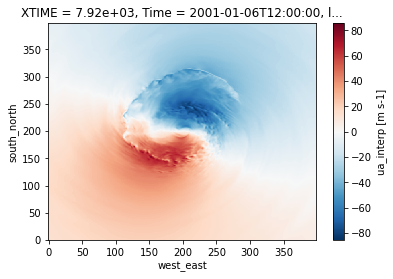

In [29]:
u = getvar(dataset, "ua")
u_level = interplevel(u,z,250)
u_level.plot()